In [146]:
# classification- yes or no,categorial
# regeression- continous data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data=pd.read_csv(r"C:\Users\KIIT\Downloads\Mobile Price Prediction.csv")

In [148]:
data

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP),Price ($)
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [149]:
data.columns=['Screen','RAM','Storage','Battery','Camera','Price']
data

,Screen,RAM,Storage,Battery,Camera,Price
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [150]:
data.isnull().sum()

Screen     0
RAM        0
Storage    0
Battery    0
Camera     0
Price      0
dtype: int64

In [151]:
for i in data.columns:
    print(i,':','\n',data[i].unique())

Screen : 
 [6.2 6.1 6.5 6.7 6.4 6.  6.3 6.6 5.8 5.7 5.9 6.8 6.9]
RAM : 
 [4 3 6 8]
Storage : 
 [ 64 128 256  32]
Battery : 
 [4000 3110 4500 4300 4200 3700 4025 5000 3000 3500 3800 4100 4400 3100
 4600 4700]
Camera : 
 [48 12 64 40 32 16 24 20]
Price : 
 [500 800 600 700 550 750 450 400 650 900]


In [152]:
for i in ['RAM','Storage']:
    print(i,':','\n',data[i].unique())

RAM : 
 [4 3 6 8]
Storage : 
 [ 64 128 256  32]


In [153]:
data.dtypes

Screen     float64
RAM          int64
Storage      int64
Battery      int64
Camera       int64
Price        int64
dtype: object

In [154]:
data1=data.describe(include='all')
data1

,Screen,RAM,Storage,Battery,Camera,Price
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,6.346575,5.592466,137.205479,4063.253425,37.808219,624.828767
std,0.245416,1.658575,70.733994,551.790772,18.314291,132.611769
min,5.700000,3.000000,32.000000,3000.000000,12.000000,400.000000
25%,6.100000,4.000000,64.000000,3700.000000,20.000000,550.000000
50%,6.400000,6.000000,128.000000,4200.000000,40.000000,600.000000
75%,6.500000,6.000000,128.000000,4500.000000,48.000000,700.000000
max,6.900000,8.000000,256.000000,5000.000000,64.000000,900.000000


<Axes: xlabel='Screen', ylabel='Price'>

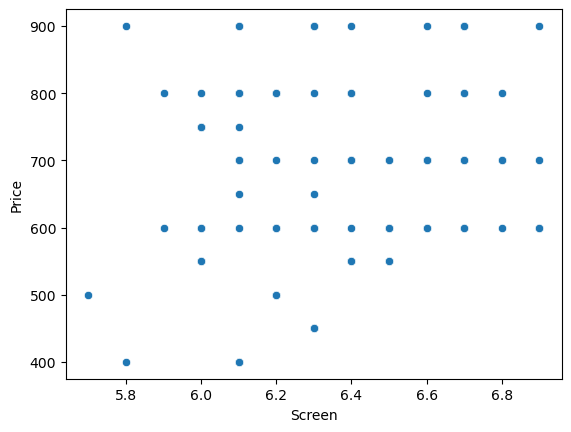

In [155]:
sns.scatterplot(x=data.Screen,y=data.Price)

<Axes: xlabel='Screen', ylabel='Price'>

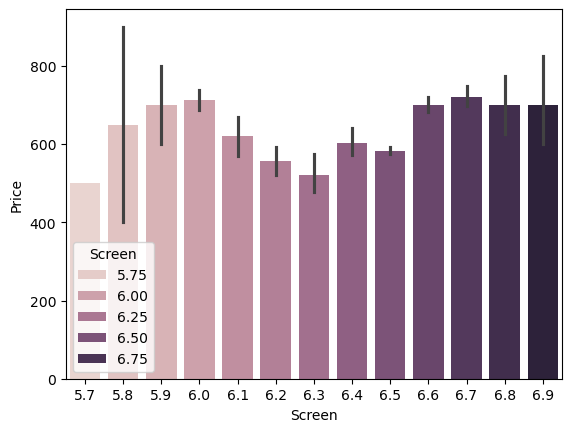

In [156]:
sns.barplot(x=data.Screen,y=data.Price,hue=data.Screen)

<Axes: xlabel='RAM', ylabel='Price'>

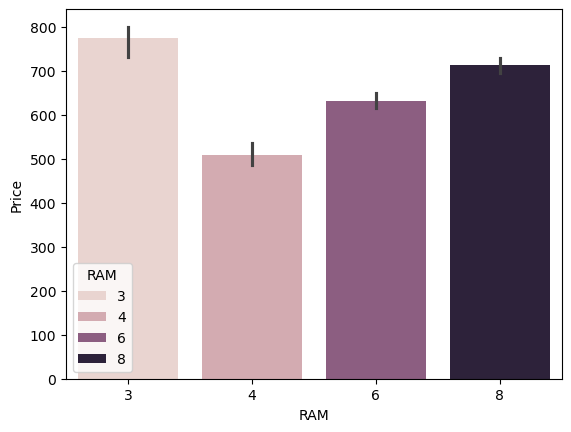

In [157]:
sns.barplot(x=data.RAM,y=data.Price,hue=data.RAM)

<Axes: xlabel='Camera', ylabel='Price'>

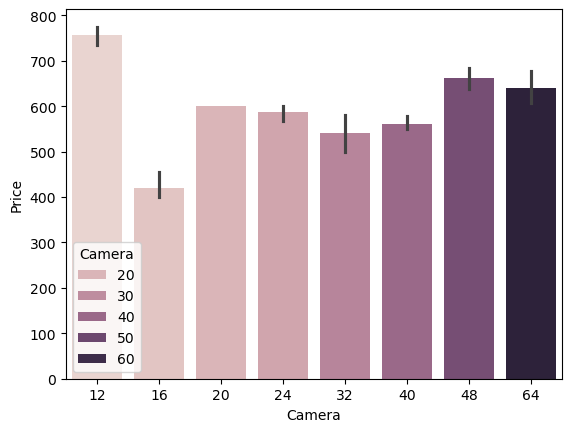

In [158]:
sns.barplot(x=data.Camera,y=data.Price,hue=data.Camera)

<Axes: xlabel='Battery', ylabel='Price'>

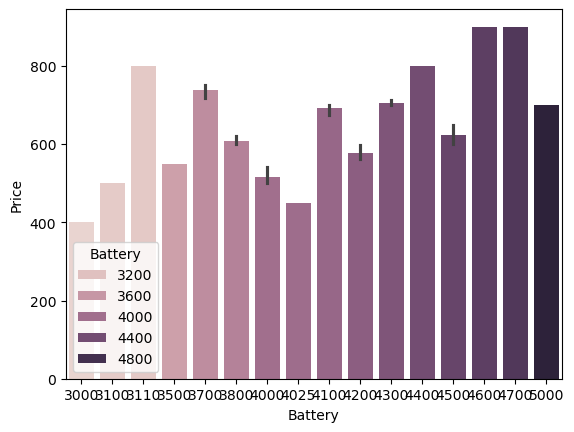

In [159]:
sns.barplot(x=data.Battery,y=data.Price,hue=data.Battery)

<Axes: xlabel='Storage', ylabel='Price'>

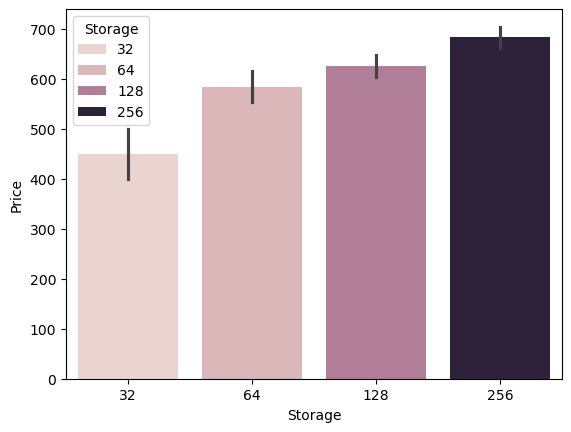

In [160]:
sns.barplot(x=data.Storage,y=data.Price,hue=data.Storage)

In [161]:
d=data.corr()

<Axes: >

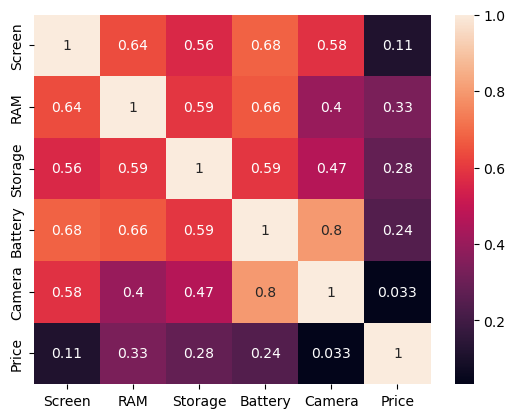

In [162]:
sns.heatmap(d,annot=True)

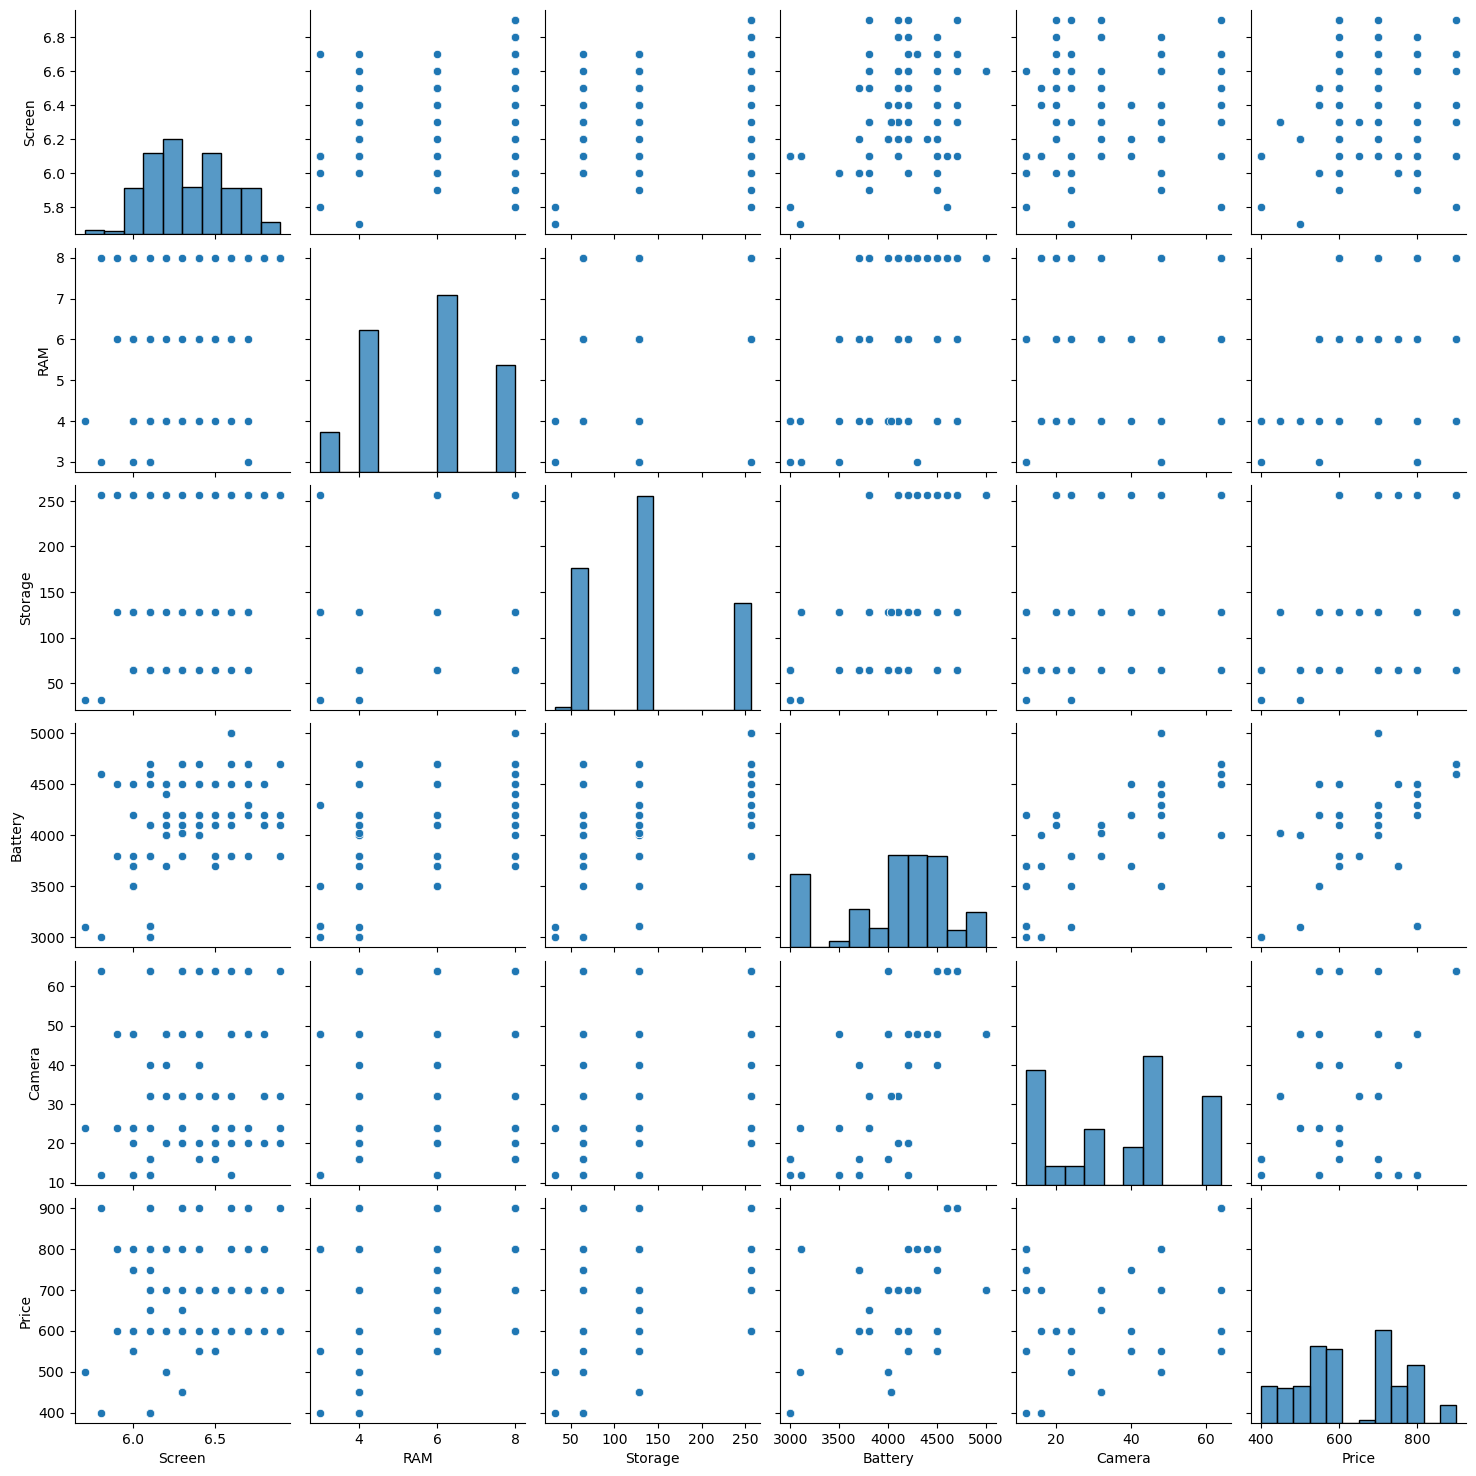

In [163]:
sns.pairplot(data)

In [164]:
ip=data.drop('Price',axis=1)
op=data.Price

In [165]:
ip.head()

,Screen,RAM,Storage,Battery,Camera
0,6.2,4,64,4000,48
1,6.1,3,128,3110,12
2,6.5,6,256,4500,64
3,6.7,8,128,4300,48
4,6.4,6,128,4200,40


In [166]:
op.head()

0    500
1    800
2    600
3    700
4    550
Name: Price, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.1)

In [169]:
data.shape

(292, 6)

In [170]:
x_train.shape

(262, 5)

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [172]:
x_train

array([[ 0.61796444,  0.22837241, -0.11686057,  0.7987383 ,  1.49498012],
       [-1.39580028, -0.96829903, -1.01737438, -0.45883653, -0.73303348],
       [ 1.02071739,  1.42504385,  1.68416704,  1.69700604,  0.60377468],
       ...,
       [-0.59029439, -0.96829903, -1.01737438, -0.09952944,  0.60377468],
       [ 1.42347033,  1.42504385,  1.68416704,  1.1580454 ,  1.49498012],
       [-0.99304734, -1.56663475, -0.11686057, -1.69844601, -1.40143756]])

In [173]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

In [174]:
yp=alg.predict(x_test)

In [175]:
yp

array([613.82228889, 534.70624651, 670.84257485, 653.87007715,
       653.87007715, 632.40018714, 560.5597518 , 604.76214786,
       613.82228889, 639.06837577, 670.84257485, 604.76214786,
       653.87007715, 653.87007715, 560.5597518 , 653.87007715,
       604.76214786, 563.0538429 , 786.15743214, 613.82228889,
       615.59747468, 689.01720566, 613.63870279, 563.0538429 ,
       613.82228889, 613.82228889, 563.0538429 , 604.76214786,
       632.40018714, 686.08720281])

In [176]:
df=pd.DataFrame({'y':list(y_test),'prediction':yp})

In [177]:
df

,y,prediction
0,450,613.822289
1,400,534.706247
2,750,670.842575
3,600,653.870077
4,600,653.870077
5,700,632.400187
6,500,560.559752
7,550,604.762148
8,450,613.822289
9,550,639.068376


In [178]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yp)
r2=r2_score(y_test,yp)

In [179]:
print(mse)
print(r2)

19973.792853998875
0.09026247122474773


In [180]:
print('m',alg.coef_
    )
print(' c',alg.intercept_)

m [-25.10242561  26.92192008  25.30633877  55.52602767 -47.18987342]
 c 624.6183206106872


# POLYNOMIAL REGRESSION MODEL

In [181]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(x_train)
pol_reg=LinearRegression()

pol_reg.fit(X_poly,y_train)
x1=poly.fit_transform(x_test)
yp2=pol_reg.predict(x1)

In [182]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2=mean_squared_error(y_test,yp2)
c2=r2_score(y_test,yp2)
print(b2,c2)

5846.334133499593 0.7337195991827109
